In [20]:
from machinelearning.mlpipeline import MLPipelines
from machinelearning.mlexplain import MLExplainer

csv_dir = 'data/gastric_cancer.csv'
label = 'Class'

%load_ext autoreload
%autoreload 2
%matplotlib inline

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [21]:
# dataloader
mlpipe = MLPipelines(label=label, csv_dir=csv_dir)
# mlpipe.feature_selection(method='mrmr', num_features=20, inner_method='chi2')
mlpipe.X.shape

There is no selected classifier.


(83, 149)

In [23]:
mod, df ,shp = mlpipe.bayesian_search(estimator_name='LogisticRegression',scoring='matthews_corrcoef', evaluation='bootstrap', n_trials=100, cv=5, warnings_filter=True,calculate_shap=True)

Normalization completed.
The specific process does not support a progress bar.
Estimator: LogisticRegression
Best parameters: {'penalty': None, 'C': 0.25478855401626344, 'solver': 'sag', 'max_iter': 321, 'n_jobs': None}
Best trials score: 0.6392093203785044.


Bootstrap validation: 100%|██████████| 100/100 [00:02<00:00, 47.08it/s]


In [7]:
# mod, df = mlpipe.random_search(estimator_name='ElasticNet',scoring='roc_auc',evaluation='bootstrap',)
# mod, df ,shp = mlpipe.bayesian_search(estimator_name='RandomForestClassifier',scoring='matthews_corrcoef', evaluation='cv_rounds', n_trials=100, cv=5, warnings_filter=True,calculate_shap=True,training_method='one_sem_grd')

In [24]:
df.roc_auc.describe()

count    100.000000
mean       0.797207
std        0.092018
min        0.558333
25%        0.756944
50%        0.807143
75%        0.857440
max        1.000000
Name: roc_auc, dtype: float64

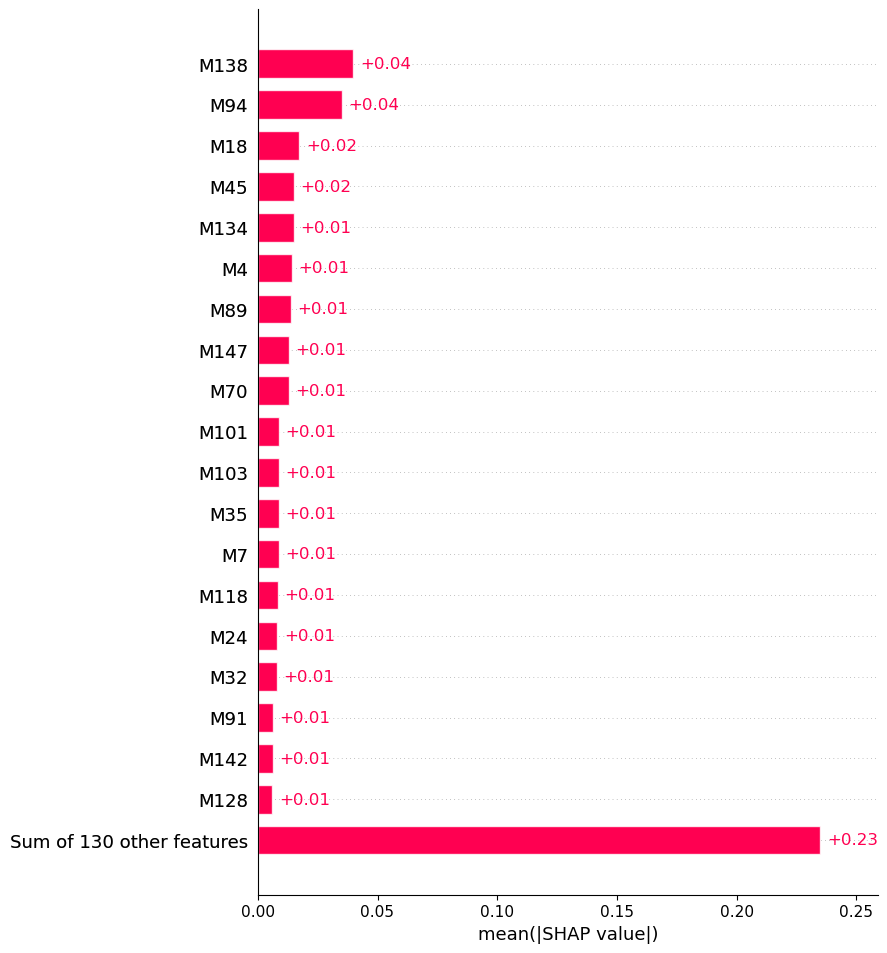

In [12]:
# mod.fit(mlpipe.X, mlpipe.y)
mlexpl = MLExplainer(mod, mlpipe.X, mlpipe.y, mlpipe.label_mapping, shap_values=shp)
# mlexpl.calculate_shap_values(explainer_type='tree')
mlexpl.plot_shap_values(plot_type="bar", max_display=20)

In [3]:
# shap_features = ['393.3454_25.66','942.9824_0.57','379.3289_23.95',
#                  '613.4767_25.19','274.2498_23.94','569.4492_25.31','467.3822_23.01'] # epic_lc_ms_pos

# shap_features = ['M25','M14','M66','M7','M52','M58','M34','M55','M63','M64','M33'] # periodontal inflammation

shap_features = ['M138','M45']

mlpipe.X=mlpipe.X[shap_features]

In [25]:
# mod, df  = mlpipe.bayesian_search(estimator_name='RandomForestClassifier',scoring='matthews_corrcoef', evaluation='bootstrap', n_trials=150, cv=5, warnings_filter=True)#,training_method='one_sem')
mod, df  = mlpipe.random_search(estimator_name='LogisticRegression',scoring='roc_auc', evaluation='bootstrap', n_iter=150, cv=5)#,training_method='one_sem')

Normalization completed.
Using default parameter grid


/home/spyros/miniconda3/envs/ai4meta/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/home/spyros/miniconda3/envs/ai4meta/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/home/spyros/miniconda3/envs/ai4meta/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/home/spyros/miniconda3/envs/ai4meta/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/home/spyros/miniconda3/envs/ai4meta/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/home

Estimator: LogisticRegression
Best parameters: {'solver': 'liblinear', 'penalty': 'l1', 'fit_intercept': True, 'C': 1.0}
Best roc_auc: 0.9475694444444445


Bootstrap validation: 100%|██████████| 100/100 [00:00<00:00, 145.72it/s]


In [28]:
df.matthews_corrcoef.describe()

count    100.000000
mean       0.620172
std        0.185052
min       -0.043519
25%        0.509201
50%        0.647952
75%        0.763889
max        1.000000
Name: matthews_corrcoef, dtype: float64

In [27]:
df.columns

Index(['Scores', 'mean_test_score', 'std_test_score', 'sem_test_score',
       'params', 'round', 'ranked', 'roc_auc', 'accuracy', 'balanced_accuracy',
       'recall', 'precision', 'f1', 'matthews_corrcoef'],
      dtype='object')

In [4]:
df = mlpipe.nested_cv(plot='box',n_trials_ncv=100,rounds=2,outer_splits=3,inner_splits=3,inner_selection='one_sem',search_on=['XGBClassifier','CatBoostClassifier'],parallel='freely_parallel',return_csv=True)
# df = mlpipe.nested_cv(plot='box',n_trials_ncv=10,rounds=2,outer_splits=3,inner_splits=3,inner_selection='validation_score',search_on=['ElasticNet','LogisticRegression','XGBClassifier'],return_csv=True)

Your Dataset contains NaN values. Some estimators does not work with NaN values.
The median method will be used for the missing values manipulation.

All the extra metrics are valid.


<IPython.core.display.HTML object>
<IPython.core.display.HTML object>


Outer fold of 1 round:  0% |             | Elapsed Time: 0:00:00 ETA:  --:--:--
Outer fold of 2 round:  0% |             | Elapsed Time: 0:00:00 ETA:  --:--:--
Outer fold of 2 round: 33% |████▎        | Elapsed Time: 0:11:14 ETA:   0:22:28
Outer fold of 1 round: 33% |████▎        | Elapsed Time: 0:29:56 ETA:   0:59:53
Outer fold of 2 round: 66% |████████▋    | Elapsed Time: 0:37:29 ETA:   0:18:44
Outer fold of 2 round:100% |█████████████| Elapsed Time: 0:37:30 Time:  0:37:30


Finished with 2 round after 0.89 hours.


Outer fold of 1 round: 66% |████████▋    | Elapsed Time: 0:41:44 ETA:   0:20:52
Outer fold of 1 round:100% |█████████████| Elapsed Time: 0:41:45 Time:  0:41:45


Finished with 1 round after 0.90 hours.
Finished with 2 estimators


Results saved to Results/gastric_cancer_one_sem_all_features_outerloops_results.csv


In [5]:
df = mlpipe.nested_cv(plot='box',n_trials_ncv=100,rounds=2,outer_splits=3,inner_splits=3,inner_selection='validation_score',search_on=['XGBClassifier','CatBoostClassifier'],parallel='freely_parallel',return_csv=True)


Your Dataset contains NaN values. Some estimators does not work with NaN values.
The median method will be used for the missing values manipulation.

All the extra metrics are valid.


Outer fold of 2 round:  0% |             | Elapsed Time: 0:00:00 ETA:  --:--:--
Outer fold of 1 round:  0% |             | Elapsed Time: 0:00:00 ETA:  --:--:--
Outer fold of 1 round: 33% |████▎        | Elapsed Time: 0:11:03 ETA:   0:22:07
Outer fold of 2 round: 33% |████▎        | Elapsed Time: 0:21:51 ETA:   0:43:42
Outer fold of 1 round: 66% |████████▋    | Elapsed Time: 0:21:49 ETA:   0:10:54
Outer fold of 1 round:100% |█████████████| Elapsed Time: 0:21:50 Time:  0:21:50


Finished with 1 round after 0.60 hours.


Outer fold of 2 round: 66% |████████▋    | Elapsed Time: 0:35:36 ETA:   0:17:48
Outer fold of 2 round:100% |█████████████| Elapsed Time: 0:35:37 Time:  0:35:37


Finished with 2 round after 0.77 hours.
Finished with 2 estimators


Results saved to Results/gastric_cancer_validation_score_all_features_outerloops_results.csv


In [7]:
df = mlpipe.nested_cv(plot='box',n_trials_ncv=100,rounds=3,outer_splits=3,inner_splits=3,inner_selection='gso_1',search_on=['XGBClassifier'],parallel='freely_parallel',return_csv=True,show_bad_samples=True)


Your Dataset contains NaN values. Some estimators does not work with NaN values.
The median method will be used for the missing values manipulation.

All the extra metrics are valid.


Outer fold of 3 round:  0% |             | Elapsed Time: 0:00:00 ETA:  --:--:--
Outer fold of 3 round: 33% |████▎        | Elapsed Time: 0:01:22 ETA:   0:02:44
Outer fold of 1 round:  0% |             | Elapsed Time: 0:00:00 ETA:  --:--:--
Outer fold of 2 round:  0% |             | Elapsed Time: 0:00:00 ETA:  --:--:--
Outer fold of 3 round: 66% |████████▋    | Elapsed Time: 0:04:02 ETA:   0:02:01
Outer fold of 3 round:100% |█████████████| Elapsed Time: 0:04:03 Time:  0:04:03


Finished with 3 round after 0.09 hours.


Outer fold of 1 round: 33% |████▎        | Elapsed Time: 0:02:11 ETA:   0:04:23
Outer fold of 2 round: 33% |████▎        | Elapsed Time: 0:02:03 ETA:   0:04:06
Outer fold of 1 round: 66% |████████▋    | Elapsed Time: 0:03:48 ETA:   0:01:54
Outer fold of 1 round:100% |█████████████| Elapsed Time: 0:03:49 Time:  0:03:49


Finished with 1 round after 0.12 hours.


Outer fold of 2 round: 66% |████████▋    | Elapsed Time: 0:03:09 ETA:   0:01:34


Finished with 2 round after 0.13 hours.
Finished with 1 estimators


Outer fold of 2 round:100% |█████████████| Elapsed Time: 0:03:10 Time:  0:03:10


Results saved to Results/gastric_cancer_gso_1_all_features_outerloops_results.csv


In [8]:
df = mlpipe.nested_cv(plot='box',n_trials_ncv=100,rounds=3,outer_splits=3,inner_splits=3,inner_selection='gso_2',search_on=['XGBClassifier'],parallel='freely_parallel',return_csv=True,show_bad_samples=True)


Your Dataset contains NaN values. Some estimators does not work with NaN values.
The median method will be used for the missing values manipulation.

All the extra metrics are valid.


Outer fold of 3 round:  0% |             | Elapsed Time: 0:00:00 ETA:  --:--:--
Outer fold of 1 round:  0% |             | Elapsed Time: 0:00:00 ETA:  --:--:--
Outer fold of 2 round:  0% |             | Elapsed Time: 0:00:00 ETA:  --:--:--
Outer fold of 3 round: 33% |████▎        | Elapsed Time: 0:01:01 ETA:   0:02:03
Outer fold of 2 round: 33% |████▎        | Elapsed Time: 0:01:15 ETA:   0:02:30
Outer fold of 1 round: 33% |████▎        | Elapsed Time: 0:01:43 ETA:   0:03:26
Outer fold of 3 round: 66% |████████▋    | Elapsed Time: 0:02:43 ETA:   0:01:21
Outer fold of 3 round:100% |█████████████| Elapsed Time: 0:02:44 Time:  0:02:44


Finished with 3 round after 0.06 hours.


Outer fold of 2 round: 66% |████████▋    | Elapsed Time: 0:03:27 ETA:   0:01:43
Outer fold of 2 round:100% |█████████████| Elapsed Time: 0:03:28 Time:  0:03:28


Finished with 2 round after 0.09 hours.


Outer fold of 1 round: 66% |████████▋    | Elapsed Time: 0:03:40 ETA:   0:01:50


Finished with 1 round after 0.09 hours.
Finished with 1 estimators


Outer fold of 1 round:100% |█████████████| Elapsed Time: 0:03:41 Time:  0:03:41


Results saved to Results/gastric_cancer_gso_2_all_features_outerloops_results.csv


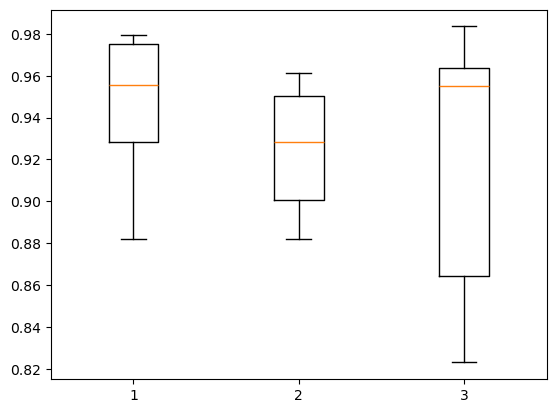

In [26]:
import matplotlib.pyplot as plt
plt.boxplot(df['roc_auc']) #df['roc_auc']
plt.show()

In [4]:
model ,df = mlpipe.bayesian_search(estimator_name='CatBoostClassifier',n_trials=15, missing_values='median')

Normalization completed.


  0%|          | 0/15 [00:00<?, ?it/s]

Estimator: CatBoostClassifier
Best parameters: {'iterations': 90, 'learning_rate': 0.036321151563099195, 'depth': 8, 'l2_leaf_reg': 0.0004417808685331767, 'border_count': 184, 'bagging_temperature': 9.13670134930253, 'random_strength': 9.861153714073298, 'leaf_estimation_method': 'Newton', 'logging_level': 'Silent', 'model_size_reg': 0.31263563587520377, 'rsm': 0.9399807945401994, 'loss_function': None}
Best matthews_corrcoef: 0.7871711623290895


In [46]:
import numpy as np
from scipy.stats import f_oneway, ttest_ind

# Example data: Mean complexity scores for different hyperparameters
important_hyperparams_1 = {
    'max_depth': [0.75],
    'n_estimators': [0.77],
    # 'learning_rate': [0.9]
}

important_hyperparams_2 = {
    'max_depth': [0.85],
    'n_estimators': [0.84],
    # 'learning_rate': [0.8]
}

less_important_hyperparams = {
    'min_samples_leaf': [0.75, 0.78],
    'min_child_weight': [0.74, 0.77],
    'gamma': [0.76, 0.79]
}

# Calculate means
important_means_1 = np.mean([np.mean(scores) for scores in important_hyperparams_1.values()])
important_means_2 = np.mean([np.mean(scores) for scores in important_hyperparams_2.values()])

# less_important_means = [np.mean(scores) for scores in less_important_hyperparams.values()]

print(f"Parameter 1: {important_means_1}, Parameter 2: {important_means_2}, Parameter Difference: {important_means_1 - important_means_2}")

Parameter 1: 0.76, Parameter 2: 0.845, Parameter Difference: -0.08499999999999996


In [13]:
samples_counts = np.zeros(10)
samples_counts[3] +=1
samples_counts

array([0., 0., 0., 1., 0., 0., 0., 0., 0., 0.])

In [9]:
import numpy as np

In [14]:
for i in samples_counts:
    print(i)

0.0
0.0
0.0
1.0
0.0
0.0
0.0
0.0
0.0
0.0


In [5]:
import optuna
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from optuna.integration import OptunaSearchCV
from sklearn.metrics import accuracy_score

# Load data
iris = datasets.load_iris()
X, y = iris.data, iris.target

# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define a simple model
model = SVC()

# Create a parameter distribution dictionary
param_distributions = {
    'C': optuna.distributions.FloatDistribution(0.01, 1),
    'kernel': optuna.distributions.CategoricalDistribution(['linear', 'poly', 'rbf', 'sigmoid']),
    'gamma': optuna.distributions.FloatDistribution(0.01, 1)
}

# Setup OptunaSearchCV
optuna_search = OptunaSearchCV(
    model,
    param_distributions,
    cv=3,
    return_train_score=True,
    n_trials=100,  # Number of trials to conduct
    timeout=600,   # Stop study after 600 seconds
    n_jobs=-1      # Use all available CPUs
)

# Fit the OptunaSearchCV to find the best hyperparameters
optuna_search.fit(X_train, y_train)

# Best parameters found
print("Best parameters:", optuna_search.best_params_)

# Predict using the best model
predictions = optuna_search.predict(X_test)
accuracy = accuracy_score(y_test, predictions)
print("Accuracy:", accuracy)


[I 2024-07-05 21:51:04,057] A new study created in memory with name: no-name-f478a1a8-74bc-4773-a5dc-40e5b3723cf3
[I 2024-07-05 21:51:04,149] Trial 1 finished with value: 0.9500000000000001 and parameters: {'C': 0.5295357139760623, 'kernel': 'rbf', 'gamma': 0.36190732697212463}. Best is trial 1 with value: 0.9500000000000001.
[I 2024-07-05 21:51:04,172] Trial 4 finished with value: 0.9416666666666668 and parameters: {'C': 0.20592782276453386, 'kernel': 'poly', 'gamma': 0.9612114538483573}. Best is trial 1 with value: 0.9500000000000001.
[I 2024-07-05 21:51:04,178] Trial 0 finished with value: 0.7333333333333334 and parameters: {'C': 0.2902145176469904, 'kernel': 'rbf', 'gamma': 0.013237285050805424}. Best is trial 1 with value: 0.9500000000000001.
[I 2024-07-05 21:51:04,184] Trial 5 finished with value: 0.325 and parameters: {'C': 0.9336066846146562, 'kernel': 'sigmoid', 'gamma': 0.7082614051302398}. Best is trial 1 with value: 0.9500000000000001.
[I 2024-07-05 21:51:04,193] Trial 6 fi

Best parameters: {'C': 0.9349413205484218, 'kernel': 'linear', 'gamma': 0.11900378926516163}
Accuracy: 1.0


In [9]:
optuna_search.trials_


[FrozenTrial(number=0, state=1, values=[0.7333333333333334], datetime_start=datetime.datetime(2024, 7, 5, 21, 51, 4, 60412), datetime_complete=datetime.datetime(2024, 7, 5, 21, 51, 4, 178575), params={'C': 0.2902145176469904, 'kernel': 'rbf', 'gamma': 0.013237285050805424}, user_attrs={'mean_fit_time': 0.017210642496744793, 'std_fit_time': 0.008458070571432984, 'mean_score_time': 0.006486733754475911, 'std_score_time': 0.004938715149793585, 'split0_test_score': 0.775, 'split1_test_score': 0.7, 'split2_test_score': 0.725, 'mean_test_score': 0.7333333333333334, 'std_test_score': 0.031180478223116204, 'split0_train_score': 0.7, 'split1_train_score': 0.75, 'split2_train_score': 0.7375, 'mean_train_score': 0.7291666666666666, 'std_train_score': 0.021245914639969964}, system_attrs={'terminator:cv_scores': [0.775, 0.7, 0.725]}, intermediate_values={}, distributions={'C': FloatDistribution(high=1.0, log=False, low=0.01, step=None), 'kernel': CategoricalDistribution(choices=('linear', 'poly', '